# **ANSERING QUESTION 5**
---

## **IMPORT**

In [13]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('../Data/movie_data.csv')
df.head(5)

,Title,Release time,Age rating,Runtime,Language,IMDb Rating,IMDb Votes,Action,Adventure,Animation,...,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,Win,Nomination,Age rating quantification
0,Goon Squad,2024-01-18,NC-17,83.0,English,6.1,12215.766268,False,False,False,...,False,False,False,False,False,False,False,0.0,0.0,5
1,The Phantom Warrior,2024-02-20,R,83.0,English,2.6,532.000000,False,True,False,...,False,True,False,False,False,False,False,0.0,0.0,4
2,Beyond the Lake,2024-01-26,G,98.0,English,6.1,31.000000,False,False,False,...,False,False,False,False,False,False,False,0.0,0.0,1
3,Crimes of Fashion: Killer Clutch,2024-03-15,PG,84.0,"English, French",5.8,503.000000,False,False,False,...,False,False,False,False,False,False,False,0.0,0.0,2
4,Love on the Danube: Love Song,2024-09-10,G,84.0,English,5.8,175.000000,False,False,False,...,True,False,False,False,False,False,False,0.0,0.0,1


In [15]:
df.columns

Index(['Title', 'Release time', 'Age rating', 'Runtime', 'Language',
       'IMDb Rating', 'IMDb Votes', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western',
       'Win', 'Nomination', 'Age rating quantification'],
      dtype='object')

## **Câu hỏi: Thể loại nào có xu hướng phát triển mạnh nhất qua các năm dựa trên số lượng phim phát hành?**

**Cách thực hiện**:

- **Cột cần thiết**: `Release time` và 13 cột thể loại

- **Tính toán**: Tính tổng số lượng phim phát hành mỗi quý theo năm theo từng thể loại

- **Trực quan hóa**: Trực quan hóa xu hướng của mỗi thể loại qua các quý theo năm để so sánh sự thay đổi về số lượng phim phát hành của từng thể loại.

### **5.1. Tiền xử lý**

In [16]:
data = df[["Release time", "Action","Adventure", "Animation", "Biography", "Comedy", "Crime", "Documentary",
          "Drama", "Family", "Fantasy", "History", "Horror","Music","Musical", "Mystery","Romance","Sci-Fi", "Short", "Sport", "Thriller",
            "War", "Western"]]
data["Year"] = data["Release time"].str[0:4].astype(int)
data["Month"] = data["Release time"].str[5:7].astype(int)
def quarter(month):
    if 1 <= month <= 3:
        return 1
    elif 4 <= month <= 6:
        return 2
    elif 7 <= month <= 9:
        return 3
    else:
        return 4
data["Quarter"] = data["Month"].apply(quarter)

data = data.drop(columns=["Release time", "Month"])

/tmp/ipykernel_5915/3732475658.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Year"] = data["Release time"].str[0:4].astype(int)
/tmp/ipykernel_5915/3732475658.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Month"] = data["Release time"].str[5:7].astype(int)
/tmp/ipykernel_5915/3732475658.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [17]:
grouped_data = data.groupby(["Quarter","Year"]).sum()
grouped_data

Action  Adventure  Animation  Biography  Comedy  Crime  \
Quarter Year                                                           
1       2023      30         15          6          4      50     21   
        2024      43         35         15         11      71     26   
2       2023      31         16          7          8      47      9   
        2024      41         27         23         10      70     37   
3       2023      26         19         10         10      54     18   
        2024      43         19         12          8      51     30   
4       2023      22         27         18         14      73     17   
        2024      34         21         16         13      40     16   

              Documentary  Drama  Family  Fantasy  ...  Music  Musical  \
Quarter Year                                       ...                   
1       2023           29     44       7        5  ...      5        1   
        2024           50     68       7       10  ...      6        1   
2       2023           34     71      13        6  ...      7        2   
        2024           43     81       9        5  ...      9        2   
3       2023           37     62      10        6  ...      1        0   
        2024           26     72      10        5  ...      0        1   
4       2023           37     88      17       15  ...      7        3   
        2024           20     64       5        6  ...      7        4   

              Mystery  Romance  Sci-Fi  Short  Sport  Thriller  War  Western  
Quarter Year                                                                  
1       2023        7       22       4      4      5        34    2        1  
        2024       14       21       9      3      6        47    4        4  
2       2023       15       32       6      3      3        30    1        1  
        2024       20       19       5      5      8        39    1        4  
3       2023       20       26       5      5      8        31    1        3  
        2024       19       17      13      0      5        51    2        2  
4       2023       14       62      11      8      5        27    2        1  
        2024       15       16       7      3      2        32    1        0  

[8 rows x 22 columns]

### **5.2. Trực quan hóa dữ liệu**

In [18]:
grouped_data = grouped_data.reset_index()
grouped_data["Time"] = grouped_data["Year"].astype(str) + "-Q" + grouped_data["Quarter"].astype(str)
grouped_data = grouped_data.sort_values(by=["Year", "Quarter"])
grouped_data = grouped_data[:-1]
grouped_data

,Quarter,Year,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,Time
0,1,2023,30,15,6,4,50,21,29,44,...,1,7,22,4,4,5,34,2,1,2023-Q1
2,2,2023,31,16,7,8,47,9,34,71,...,2,15,32,6,3,3,30,1,1,2023-Q2
4,3,2023,26,19,10,10,54,18,37,62,...,0,20,26,5,5,8,31,1,3,2023-Q3
6,4,2023,22,27,18,14,73,17,37,88,...,3,14,62,11,8,5,27,2,1,2023-Q4
1,1,2024,43,35,15,11,71,26,50,68,...,1,14,21,9,3,6,47,4,4,2024-Q1
3,2,2024,41,27,23,10,70,37,43,81,...,2,20,19,5,5,8,39,1,4,2024-Q2
5,3,2024,43,19,12,8,51,30,26,72,...,1,19,17,13,0,5,51,2,2,2024-Q3


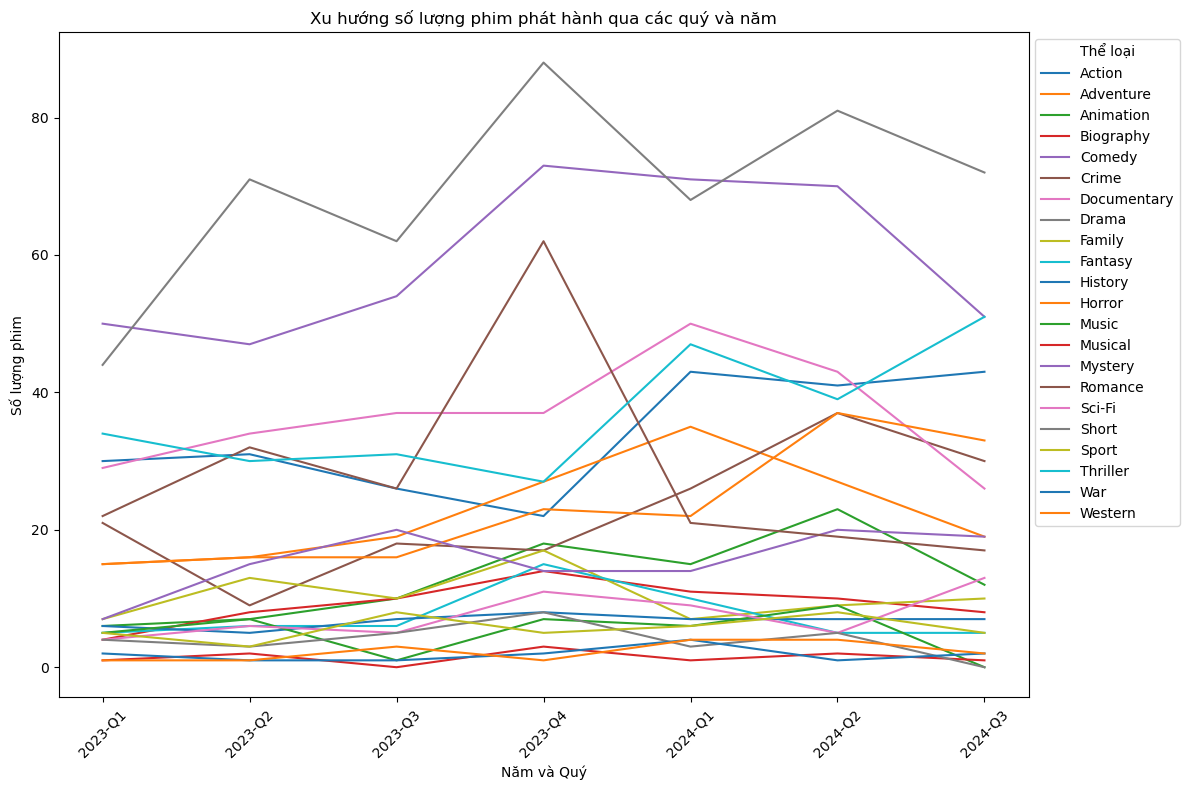

In [19]:
plt.figure(figsize=(12, 8))

for column in grouped_data.columns[2:-1]: 
    plt.plot(grouped_data["Time"], grouped_data[column], label=column)

plt.title("Xu hướng số lượng phim phát hành qua các quý và năm")
plt.xlabel("Năm và Quý")
plt.ylabel("Số lượng phim")
plt.xticks(rotation=45)  
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Thể loại")  
plt.tight_layout()

plt.show()

**Nhận xét:**
- **Xu hướng phát hành phim:**
    - Drama, Documentary và Comedy có số lượng phim phát hành vượt trội so với các thể loại khác, duy trì mức ổn định hoặc tăng dần qua các quý.
    - Thể loại Drama thể hiện xu hướng tăng rõ rệt từ 2023-Q1 đến 2024-Q2, sau đó giảm nhẹ ở 2024-Q3, nhưng vẫn nằm trong nhóm dẫn đầu.
- **Sự ổn định và biến động**:
    - Action, Adventure, Sci-Fi và Animation có xu hướng ít biến động và duy trì mức trung bình thấp
    - Một số thể loại như Horror, Thriller và Fantasy có sự dao động mạnh qua các quý  
- **Thể loại ít phổ biến:**
    - Các thể loại như War, Western, Sport và Short có số lượng phim phát hành rất thấp, dao động dưới mức 10 phim mỗi quý
- **Sự tăng trưởng đột biến:**
    - Có một số quý xuất hiện sự tăng trưởng đột biến ở các thể loại như Crime và Music nhưng không duy trì lâu dài

### **5.3. Kết luận**

- Các thể loại như Drama, Documentary và Comedy thống trị thị trường với sự tăng trưởng ổn định, phù hợp với thị hiếu khán giả phổ thông. Tuy nhiên Comedy có xu hướng giảm những quý gần đây
- Những thể loại ít phổ biến như Short và Western cho thấy thị trường hẹp và ít tiềm năng phát triển, có thể được khai thác với mục đích thử nghiệm hoặc phục vụ các thị trường ngách.
- Việc giảm phát hành Comedy có thể phản ánh sự thay đổi trong sở thích của khán giả. Nhà sản xuất có thể tập trung vào Drama và Documentary để tối ưu hóa lượng phát hành.